In [1]:
using Revise

In [2]:
using Plots

In [26]:
include("exact.jl")

In [27]:
@time freq, Q = scheme1(1.0e-10, 100000);

2 basis: ω=316.22776601683796 for the last freq 1.0
3 basis: ω=17.78279410038923 between (1.0, 316.22776601683796)
4 basis: ω=4.216965034285822 between (1.0, 17.78279410038923)
5 basis: ω=2.0535250264571463 between (1.0, 4.216965034285822)
6 basis: ω=74.98942093324558 between (17.78279410038923, 316.22776601683796)
7 basis: ω=8.659643233600654 between (4.216965034285822, 17.78279410038923)
8 basis: ω=5623.413251903491 for the last freq 316.22776601683796
9 basis: ω=1333.521432163324 between (316.22776601683796, 5623.413251903491)
10 basis: ω=1.4330125702369627 between (1.0, 2.0535250264571463)
11 basis: ω=36.51741272548377 between (17.78279410038923, 74.98942093324558)
12 basis: ω=23713.737056616552 for the last freq 5623.413251903491
13 basis: ω=153.9926526059492 between (74.98942093324558, 316.22776601683796)
14 basis: ω=649.3816315762114 between (316.22776601683796, 1333.521432163324)
15 basis: ω=48696.75251658631 for the last freq 23713.737056616552
16 basis: ω=2.942727176209282 be

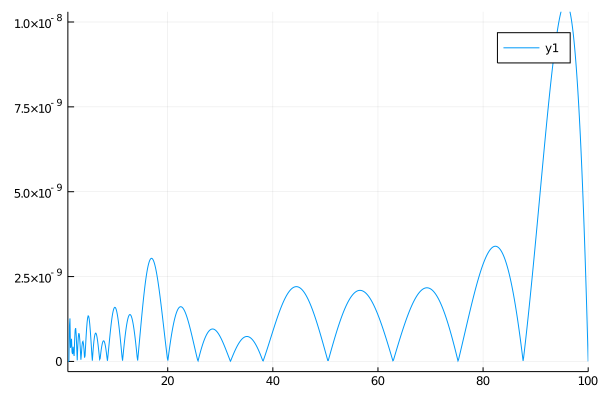

In [20]:
ω = Float.(LinRange(1.0+1.0e-6, 100.0-1.0e-6, 1000))
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 1.0e-8])

In [102]:
freq = zeros(Float, rank)
freq[1] = 1.0
Q = [zeros(Float, rank), ]
Q[1][1] = 1.0 / Norm(freq[1])

1.414213562373095

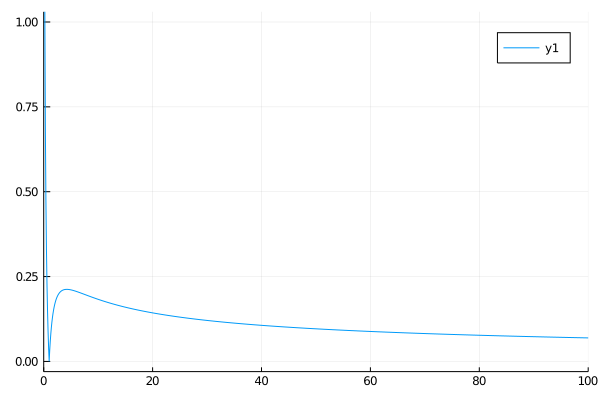

In [103]:
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(0.0, 100.0), ylims=[0.0, 1.0])

In [97]:
DNorm2(freq, Q, 100.0)

-5.0e-5

In [104]:
q2=find_zero(x->DNorm2(freq, Q, x), (1.0+1e-10, 100.0), Bisection())

4.236067977499788

In [105]:
freq[2] = q2
push!(Q, orthognalize(freq, Q, freq[2]))
testOrthgonal(freq, Q)

Max Err: 2.220446049250313e-16


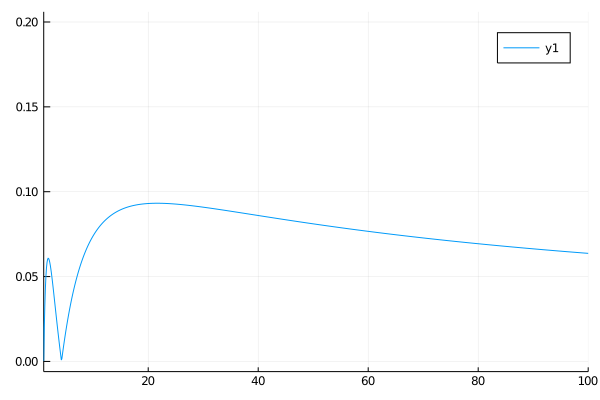

In [106]:
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 0.2])

In [107]:
q3=find_zero(x->DNorm2(freq, Q, x), (freq[2]+1e-10, 100.0), Bisection())

21.628727274010252

In [108]:
freq[3] = q3
push!(Q, orthognalize(freq, Q, freq[3]))
testOrthgonal(freq, Q)

Max Err: 2.220446049250313e-16


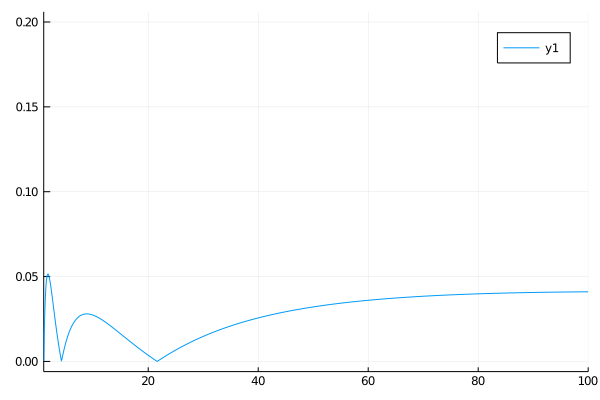

In [109]:
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 0.2])

In [110]:
q4=find_zero(x->DNorm2(freq, Q, x), (freq[1]+1e-10, freq[2]-1e-10), Bisection())

1.7636062228413898

Max Err: 2.653433028854124e-14


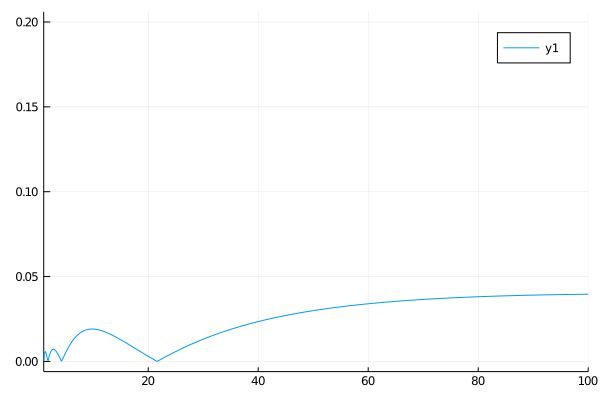

In [111]:
freq[4] = q4
push!(Q, orthognalize(freq, Q, freq[4]))
testOrthgonal(freq, Q)
ω = LinRange(0.0, 100.0, 1000)
y = [Norm(freq, Q, w) for w in ω]
plot(ω, y, xlims=(1.0, 100.0), ylims=[0.0, 0.2])

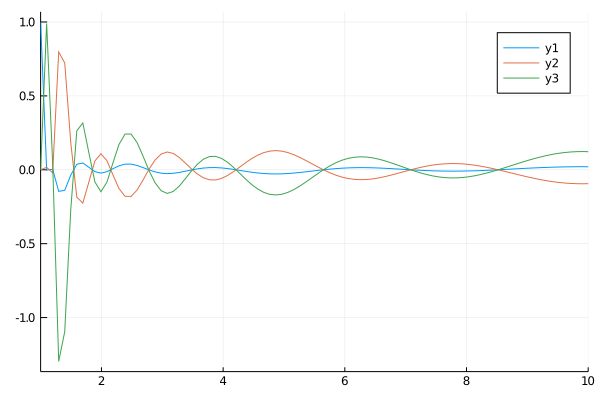

In [23]:
ω=Float.(LinRange(1.0, 100.0, 1000))

p1=[projectedKernel(freq, Q, w)[1] for w in ω]
p2=[projectedKernel(freq, Q, w)[2] for w in ω]
p3=[projectedKernel(freq, Q, w)[3] for w in ω]
#println(length(p), length(ω))
plot(ω, p1, xlims=(1.0, 10.0))
plot!(ω, p2, xlims=(1.0, 10.0))
plot!(ω, p3, xlims=(1.0, 10.0))